In [1]:
import boto3
import sagemaker
from sagemaker import get_execution_role
import sys
import IPython

if int(sagemaker.__version__.split('.')[0]) == 2:
    print("Installing previous SageMaker Version and restarting the kernel")
    !{sys.executable} -m pip install sagemaker==1.72.0
    IPython.Application.instance().kernel.do_shutdown(True)

else:
    print("Version is good")


role = get_execution_role()
sess = sagemaker.Session()
region = boto3.session.Session().region_name
print("Region = {}".format(region))
sm = boto3.Session().client('sagemaker')

Version is good
Region = us-east-2


In [2]:
%pip install wbdata

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install pycountry

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from time import sleep, gmtime, strftime
import json
import time

import wbdata

In [5]:
wbdata.get_source()

  id  name
----  --------------------------------------------------------------------
   1  Doing Business
   2  World Development Indicators
   3  Worldwide Governance Indicators
   5  Subnational Malnutrition Database
   6  International Debt Statistics
  11  Africa Development Indicators
  12  Education Statistics
  13  Enterprise Surveys
  14  Gender Statistics
  15  Global Economic Monitor
  16  Health Nutrition and Population Statistics
  18  IDA Results Measurement System
  19  Millennium Development Goals
  20  Quarterly Public Sector Debt
  22  Quarterly External Debt Statistics SDDS
  23  Quarterly External Debt Statistics GDDS
  24  Poverty and Equity
  25  Jobs
  27  Global Economic Prospects
  28  Global Financial Inclusion
  29  The Atlas of Social Protection: Indicators of Resilience and Equity
  30  Exporter Dynamics Database – Indicators at Country-Year Level
  31  Country Policy and Institutional Assessment
  32  Global Financial Development
  33  G20 Financial Inclus

In [6]:
wbdata.get_indicator(source=75)

id                 name
-----------------  ---------------------------------------------------------------------------------------------------------
AG.LND.AGRI.ZS     Agricultural land (% of land area)
AG.LND.FRST.ZS     Forest area (% of land area)
AG.PRD.FOOD.XD     Food production index (2014-2016 = 100)
CC.EST             Control of Corruption: Estimate
EG.CFT.ACCS.ZS     Access to clean fuels and technologies for cooking (% of population)
EG.EGY.PRIM.PP.KD  Energy intensity level of primary energy (MJ/$2011 PPP GDP)
EG.ELC.ACCS.ZS     Access to electricity (% of population)
EG.ELC.COAL.ZS     Electricity production from coal sources (% of total)
EG.ELC.RNEW.ZS     Renewable electricity output (% of total electricity output)
EG.FEC.RNEW.ZS     Renewable energy consumption (% of total final energy consumption)
EG.IMP.CONS.ZS     Energy imports, net (% of energy use)
EG.USE.COMM.FO.ZS  Fossil fuel energy consumption (% of total)
EG.USE.PCAP.KG.OE  Energy use (kg of oil equivalent pe

In [7]:
indicators = dict(zip([i['id'] for i in wbdata.get_indicator(source=75)],[i['name'] for i in wbdata.get_indicator(source=75)]))
indicators

{'AG.LND.AGRI.ZS': 'Agricultural land (% of land area)',
 'AG.LND.FRST.ZS': 'Forest area (% of land area)',
 'AG.PRD.FOOD.XD': 'Food production index (2014-2016 = 100)',
 'CC.EST': 'Control of Corruption: Estimate',
 'EG.CFT.ACCS.ZS': 'Access to clean fuels and technologies for cooking (% of population)',
 'EG.EGY.PRIM.PP.KD': 'Energy intensity level of primary energy (MJ/$2011 PPP GDP)',
 'EG.ELC.ACCS.ZS': 'Access to electricity (% of population)',
 'EG.ELC.COAL.ZS': 'Electricity production from coal sources (% of total)',
 'EG.ELC.RNEW.ZS': 'Renewable electricity output (% of total electricity output)',
 'EG.FEC.RNEW.ZS': 'Renewable energy consumption (% of total final energy consumption)',
 'EG.IMP.CONS.ZS': 'Energy imports, net (% of energy use)',
 'EG.USE.COMM.FO.ZS': 'Fossil fuel energy consumption (% of total)',
 'EG.USE.PCAP.KG.OE': 'Energy use (kg of oil equivalent per capita)',
 'EN.ATM.CO2E.PC': 'CO2 emissions (metric tons per capita)',
 'EN.ATM.METH.PC': 'Methane emissions 

In [8]:
indicators = {"IC.BUS.EASE.XQ": "ease_doing_business", "IC.REG.STRT.BUS.DFRN" : "business_score", "GE.EST" : "government_effectiveness", 
              "RL.EST" : "rule_of_law", "RQ.EST" : "reg_quality", "CC.EST" : "corrupt_control", "SL.UEM.TOTL.ZS" : "unemployment_tot",
             "EN.ATM.CO2E.PC" : "co2_emissions", "PV.EST" : "polit_stability_abs_violence", "IC.LGL.CRED.XQ" : "Strength of legal rights",
             "EG.ELC.RNEW.ZS" : "renew_electricty_output", "SP.DYN.LE00.IN" : "life_expectancy",
             "EG.USE.COMM.FO.ZS" : "fossil_fuel_consumption", "EG.ELC.ACCS.ZS" : "access_electricity",
             "SH.H2O.SMDW.ZS" : "safe_drinking_water_quota", "RESLV.ISV.RK.DB19" : "resolve_insolvency"}   
data = wbdata.get_dataframe(indicators, country='all', convert_date=True)
#data = wbdata.get_dataframe(indicators, country=countries, convert_date=True)
data

ease_doing_business  business_score  \
country     date                                              
Afghanistan 1960-01-01                  NaN             NaN   
            1961-01-01                  NaN             NaN   
            1962-01-01                  NaN             NaN   
            1963-01-01                  NaN             NaN   
            1964-01-01                  NaN             NaN   
...                                     ...             ...   
Zimbabwe    2016-01-01                  NaN            49.2   
            2017-01-01                  NaN            48.8   
            2018-01-01                  NaN            59.3   
            2019-01-01                140.0            66.5   
            2020-01-01                  NaN            72.0   

                        government_effectiveness  rule_of_law  reg_quality  \
country     date                                                             
Afghanistan 1960-01-01                       NaN          NaN          NaN   
            1961-01-01                       NaN          NaN          NaN   
            1962-01-01                       NaN          NaN          NaN   
            1963-01-01                       NaN          NaN          NaN   
            1964-01-01                       NaN          NaN          NaN   
...                                          ...          ...          ...   
Zimbabwe    2016-01-01                 -1.158399    -1.368501    -1.720110   
            2017-01-01                 -1.182262    -1.373646    -1.561047   
            2018-01-01                 -1.198210    -1.272543    -1.504843   
            2019-01-01                 -1.204820    -1.257262    -1.462590   
            2020-01-01                 -1.250607    -1.274851    -1.422032   

                        corrupt_control  unemployment_tot  co2_emissions  \
country     date                                                           
Afghanistan 1960-01-01              NaN               NaN       0.046057   
            1961-01-01              NaN               NaN       0.053589   
            1962-01-01              NaN               NaN       0.073721   
            1963-01-01              NaN               NaN       0.074161   
            1964-01-01              NaN               NaN       0.086174   
...                                 ...               ...            ...   
Zimbabwe    2016-01-01        -1.259222              5.24       0.783303   
            2017-01-01        -1.271278              5.15       0.718570   
            2018-01-01        -1.230871              5.07       0.849793   
            2019-01-01        -1.236825              5.02            NaN   
            2020-01-01        -1.253140              5.73            NaN   

                        polit_stability_abs_violence  \
country     date                                       
Afghanistan 1960-01-01                           NaN   
            1961-01-01                           NaN   
            1962-01-01                           NaN   
            1963-01-01                           NaN   
            1964-01-01                           NaN   
...                                              ...   
Zimbabwe    2016-01-01                     -0.619938   
            2017-01-01                     -0.708769   
            2018-01-01                     -0.722774   
            2019-01-01                     -0.959749   
            2020-01-01                     -1.080208   

                        Strength of legal rights  renew_electricty_output  \
country     date                                                            
Afghanistan 1960-01-01                       NaN                      NaN   
            1961-01-01                       NaN                      NaN   
            1962-01-01                       NaN                      NaN   
            1963-01-01                       NaN                      NaN   
         

# ESG Rating

In [110]:
esg_rating = data.sort_index().groupby('country').last()
esg_rating.drop(index=['World'], inplace=True)
esg_rating

,ease_doing_business,business_score,government_effectiveness,rule_of_law,reg_quality,corrupt_control,unemployment_tot,co2_emissions,polit_stability_abs_violence,Strength of legal rights,renew_electricty_output,life_expectancy,fossil_fuel_consumption,access_electricity,safe_drinking_water_quota,resolve_insolvency
country,,,,,,,,,,,,,,,,
Afghanistan,173.0,92.0,-1.523115,-1.807697,-1.378587,-1.475405,11.730000,0.200151,-2.729808,10.000000,86.050111,64.833000,NaN,97.700000,27.588956,76.0
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,6.814177,0.933541,NaN,4.538462,25.675879,64.005197,49.304292,43.640661,NaN,NaN
Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,6.300105,0.515544,NaN,5.863636,31.233531,58.115723,23.471278,51.341421,23.986290,NaN
Albania,82.0,91.8,-0.135743,-0.358294,0.237131,-0.540196,11.700000,1.939732,0.083936,8.000000,100.000000,78.573000,61.421801,100.000000,70.674537,39.0
Algeria,157.0,78.0,-0.525844,-0.780318,-1.291494,-0.641845,12.830000,3.591657,-0.860165,2.000000,0.322684,76.880000,99.977917,99.500000,72.381456,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),NaN,NaN,0.696851,0.941124,1.339709,0.043223,11.840000,NaN,1.014357,NaN,3.877525,79.668293,NaN,100.000000,97.935994,NaN
West Bank and Gaza,117.0,70.2,-0.643822,-0.461406,0.079794,-0.550139,27.350000,NaN,-2.047813,8.000000,0.000000,74.053000,NaN,100.000000,79.698942,168.0
"Yemen, Rep.",187.0,76.8,-2.307661,-1.776561,-1.799907,-1.679567,13.420000,0.326682,-2.671682,0.000000,0.000000,66.125000,98.488503,72.751701,NaN,159.0


In [111]:
for col in esg_rating.columns:
    print(col, esg_rating[col].isna().sum())
    if esg_rating[col].isna().sum() > 100:
        esg_rating.drop(columns=[col], inplace=True)
esg_rating

ease_doing_business 110
business_score 86
government_effectiveness 87
rule_of_law 85
reg_quality 87
corrupt_control 87
unemployment_tot 65
co2_emissions 50
polit_stability_abs_violence 85
Strength of legal rights 62
renew_electricty_output 35
life_expectancy 44
fossil_fuel_consumption 80
access_electricity 36
safe_drinking_water_quota 147
resolve_insolvency 109


,business_score,government_effectiveness,rule_of_law,reg_quality,corrupt_control,unemployment_tot,co2_emissions,polit_stability_abs_violence,Strength of legal rights,renew_electricty_output,life_expectancy,fossil_fuel_consumption,access_electricity
country,,,,,,,,,,,,,
Afghanistan,92.0,-1.523115,-1.807697,-1.378587,-1.475405,11.730000,0.200151,-2.729808,10.000000,86.050111,64.833000,NaN,97.700000
Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,6.814177,0.933541,NaN,4.538462,25.675879,64.005197,49.304292,43.640661
Africa Western and Central,NaN,NaN,NaN,NaN,NaN,6.300105,0.515544,NaN,5.863636,31.233531,58.115723,23.471278,51.341421
Albania,91.8,-0.135743,-0.358294,0.237131,-0.540196,11.700000,1.939732,0.083936,8.000000,100.000000,78.573000,61.421801,100.000000
Algeria,78.0,-0.525844,-0.780318,-1.291494,-0.641845,12.830000,3.591657,-0.860165,2.000000,0.322684,76.880000,99.977917,99.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),NaN,0.696851,0.941124,1.339709,0.043223,11.840000,NaN,1.014357,NaN,3.877525,79.668293,NaN,100.000000
West Bank and Gaza,70.2,-0.643822,-0.461406,0.079794,-0.550139,27.350000,NaN,-2.047813,8.000000,0.000000,74.053000,NaN,100.000000
"Yemen, Rep.",76.8,-2.307661,-1.776561,-1.799907,-1.679567,13.420000,0.326682,-2.671682,0.000000,0.000000,66.125000,98.488503,72.751701


In [113]:
esg_rating = esg_rating.dropna()

In [117]:
env_cols = ["fossil_fuel_consumption", "access_electricity", "renew_electricty_output", "co2_emissions"]
social_cols = ["Strength of legal rights", "life_expectancy", "unemployment_tot"]
gov_cols = ["business_score", "government_effectiveness", "rule_of_law", "reg_quality", "corrupt_control"]

In [120]:
from sklearn.preprocessing import MinMaxScaler

scaled_data = 10*MinMaxScaler().fit_transform(esg_rating)
esg_rating_scaled = pd.DataFrame(data=scaled_data, columns=esg_rating.columns, index=esg_rating.index)
esg_rating_scaled

,business_score,government_effectiveness,rule_of_law,reg_quality,corrupt_control,unemployment_tot,co2_emissions,polit_stability_abs_violence,Strength of legal rights,renew_electricty_output,life_expectancy,fossil_fuel_consumption,access_electricity
country,,,,,,,,,,,,,
Albania,8.906667,4.719666,4.492240,5.664831,3.268913,4.006331,0.590798,6.675540,6.666667,10.000000,8.073847,6.142476,10.000000
Algeria,7.066667,3.886066,3.538512,2.298344,3.025479,4.403799,1.100817,4.436963,1.666667,0.032268,7.509990,9.998273,9.946398
Angola,7.253333,2.484370,3.125282,3.141807,2.342356,2.599367,0.265892,5.241925,0.833333,5.317493,2.270082,4.830792,4.175601
Argentina,7.386667,4.546154,4.241217,3.893216,4.283883,3.995779,1.222948,6.562913,1.666667,2.814007,7.439049,8.772663,10.000000
Armenia,9.480000,4.744255,5.113871,5.693277,4.638268,6.999648,0.572432,5.121910,5.000000,2.833697,6.912827,7.456545,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",0.000000,1.205491,0.000000,0.221743,0.825888,3.105874,1.468559,2.877476,0.833333,6.369504,5.906011,8.838223,10.000000
Vietnam,8.013333,5.437768,4.999275,4.816857,3.717914,0.689413,0.825156,6.302405,6.666667,3.673206,7.017073,6.982520,9.935677
"Yemen, Rep.",6.906667,0.078528,1.287109,1.178667,0.540298,4.611326,0.092781,0.141641,0.000000,0.000000,3.928015,9.849324,7.078853


In [119]:
esg_rating_scaled[env_cols].isna().sum()

fossil_fuel_consumption    0
access_electricity         0
renew_electricty_output    0
co2_emissions              0
dtype: int64

In [123]:
esg_rating_scaled['env_score'] = esg_rating_scaled[env_cols].mean(axis=1)
esg_rating_scaled['social_score'] = esg_rating_scaled[social_cols].mean(axis=1)
esg_rating_scaled['gov_score'] = esg_rating_scaled[gov_cols].mean(axis=1)

env_weight = 0.3 # arbitrary weights
social_weight = 0.3
gov_weight = 0.4

esg_rating_scaled['final score'] = esg_rating_scaled.apply(lambda row: env_weight*row['env_score']+social_weight*row['social_score']+gov_weight*row['gov_score'], axis=1)
esg_rating_scaled

,business_score,government_effectiveness,rule_of_law,reg_quality,corrupt_control,unemployment_tot,co2_emissions,polit_stability_abs_violence,Strength of legal rights,renew_electricty_output,life_expectancy,fossil_fuel_consumption,access_electricity,env_score,social_score,gov_score,final score
country,,,,,,,,,,,,,,,,,
Albania,8.906667,4.719666,4.492240,5.664831,3.268913,4.006331,0.590798,6.675540,6.666667,10.000000,8.073847,6.142476,10.000000,6.683318,6.248948,5.410463,6.043865
Algeria,7.066667,3.886066,3.538512,2.298344,3.025479,4.403799,1.100817,4.436963,1.666667,0.032268,7.509990,9.998273,9.946398,5.269439,4.526818,3.963014,4.524083
Angola,7.253333,2.484370,3.125282,3.141807,2.342356,2.599367,0.265892,5.241925,0.833333,5.317493,2.270082,4.830792,4.175601,3.647444,1.900928,3.669429,3.132283
Argentina,7.386667,4.546154,4.241217,3.893216,4.283883,3.995779,1.222948,6.562913,1.666667,2.814007,7.439049,8.772663,10.000000,5.702405,4.367165,4.870227,4.968962
Armenia,9.480000,4.744255,5.113871,5.693277,4.638268,6.999648,0.572432,5.121910,5.000000,2.833697,6.912827,7.456545,10.000000,5.215669,6.304159,5.933934,5.829522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Venezuela, RB",0.000000,1.205491,0.000000,0.221743,0.825888,3.105874,1.468559,2.877476,0.833333,6.369504,5.906011,8.838223,10.000000,6.669072,3.281740,0.450624,3.165493
Vietnam,8.013333,5.437768,4.999275,4.816857,3.717914,0.689413,0.825156,6.302405,6.666667,3.673206,7.017073,6.982520,9.935677,5.354140,4.791051,5.397029,5.202369
"Yemen, Rep.",6.906667,0.078528,1.287109,1.178667,0.540298,4.611326,0.092781,0.141641,0.000000,0.000000,3.928015,9.849324,7.078853,4.255240,2.846447,1.998254,2.929808


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='final score', ylabel='Density'>

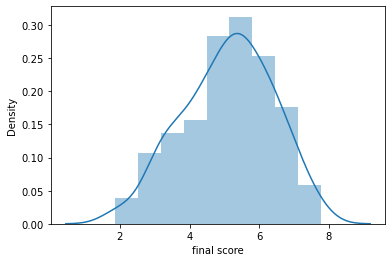

In [127]:
sns.distplot(esg_rating_scaled['final score'])

### compute quantiles (5% for laggards, 95% for leaders)

In [128]:
esg_rating_scaled['final score'].quantile([.05,.95])

0.05    2.926521
0.95    7.040194
Name: final score, dtype: float64

### Assign letter rating based on pre-defined bins

In [132]:
bins  = [0, 1.45, 2.92, 4.45, 5.65, 7.04, 8.52, 10]
labels = ['CCC', 'B', 'BB', 'BBB', 'A', 'AA', 'AAA']
esg_rating_scaled['letter_rating'] = pd.cut(esg_rating_scaled['final score'], bins, labels=labels)
esg_rating_scaled[['final score','letter_rating']].sort_values(by = 'final score', ascending=False)

,final score,letter_rating
country,,
New Zealand,7.767514,AA
Canada,7.681947,AA
Australia,7.551543,AA
Singapore,7.368841,AA
Denmark,7.344193,AA
...,...,...
Mozambique,2.845892,B
Haiti,2.251070,B
Guinea-Bissau,2.105148,B


# Modelling spread

### Read in data, create mapping for ISO3 expressions to country names

In [9]:
import pycountry

In [10]:
import openpyxl

spreads = pd.read_excel('s3://sagemaker-studio-gsbrzvsdujp/2021_ESG_datascientist_casestudy_v2_data.xlsx', engine='openpyxl')
spreads

,Date,ARG,BHR,BGD,BRB,BRA,CHL,CHN,COL,CRI,...,ZAF,KOR,TWN,TZA,THA,TTO,TUR,UKR,ARE,ZWE
0,2010-01-29,464.351,392.941,NaN,712.853,304.662,224.502,667.424,373.192,NaN,...,459.082,254.194,400.960,NaN,283.215,NaN,517.126,1376.331,408.946,NaN
1,2010-02-26,460.941,427.910,NaN,759.959,288.340,249.703,744.089,356.209,NaN,...,514.118,256.855,422.153,NaN,288.972,NaN,526.159,1411.650,409.554,NaN
2,2010-03-31,383.004,394.637,NaN,618.887,240.890,232.358,663.063,312.686,NaN,...,441.662,220.201,365.876,NaN,248.962,NaN,503.233,787.873,319.135,NaN
3,2010-04-30,384.763,356.807,NaN,612.913,259.530,225.250,547.414,317.405,NaN,...,457.823,217.857,324.948,NaN,262.821,NaN,521.688,788.378,318.533,NaN
4,2010-05-31,463.823,366.155,NaN,767.673,334.854,285.291,727.879,388.478,NaN,...,537.613,276.839,397.631,NaN,310.661,NaN,559.676,973.514,394.396,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
738,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
spreads = spreads.dropna(how='all')
spreads

,Date,ARG,BHR,BGD,BRB,BRA,CHL,CHN,COL,CRI,...,ZAF,KOR,TWN,TZA,THA,TTO,TUR,UKR,ARE,ZWE
0,2010-01-29,464.351,392.941,NaN,712.853,304.662,224.502,667.424,373.192,NaN,...,459.082,254.194,400.960,NaN,283.215,NaN,517.126,1376.331,408.946,NaN
1,2010-02-26,460.941,427.910,NaN,759.959,288.340,249.703,744.089,356.209,NaN,...,514.118,256.855,422.153,NaN,288.972,NaN,526.159,1411.650,409.554,NaN
2,2010-03-31,383.004,394.637,NaN,618.887,240.890,232.358,663.063,312.686,NaN,...,441.662,220.201,365.876,NaN,248.962,NaN,503.233,787.873,319.135,NaN
3,2010-04-30,384.763,356.807,NaN,612.913,259.530,225.250,547.414,317.405,NaN,...,457.823,217.857,324.948,NaN,262.821,NaN,521.688,788.378,318.533,NaN
4,2010-05-31,463.823,366.155,NaN,767.673,334.854,285.291,727.879,388.478,NaN,...,537.613,276.839,397.631,NaN,310.661,NaN,559.676,973.514,394.396,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2021-05-31,1255.093,489.278,363.3074,768.496,365.508,228.236,346.539,335.023,NaN,...,291.748,178.518,75.029,450.943,224.826,657.643,545.411,503.265,229.215,487.6085
137,2021-06-30,1137.436,490.887,363.3074,768.496,368.452,238.916,352.327,333.784,NaN,...,281.024,173.815,73.020,435.959,221.988,644.949,517.258,700.343,232.567,485.7393
138,2021-07-30,1162.688,507.225,363.3074,768.496,394.364,258.363,398.213,359.300,NaN,...,343.234,178.118,80.296,467.487,237.117,642.039,515.642,732.327,250.409,501.8060
139,2021-08-31,1069.977,501.568,363.3074,768.496,380.865,248.044,351.508,350.382,NaN,...,326.069,174.069,79.005,460.645,237.206,644.300,506.800,727.839,235.350,451.6251


In [12]:
spread_countries = spreads.columns.tolist()[1:]

iso3_dict = {}
for country in spread_countries:
    iso3_dict[pycountry.countries.get(alpha_3=country).name] = country
print(iso3_dict)

{'Argentina': 'ARG', 'Bahrain': 'BHR', 'Bangladesh': 'BGD', 'Barbados': 'BRB', 'Brazil': 'BRA', 'Chile': 'CHL', 'China': 'CHN', 'Colombia': 'COL', 'Costa Rica': 'CRI', 'Czechia': 'CZE', 'Dominican Republic': 'DOM', 'Egypt': 'EGY', 'El Salvador': 'SLV', 'Georgia': 'GEO', 'Ghana': 'GHA', 'Guatemala': 'GTM', 'Hong Kong': 'HKG', 'Hungary': 'HUN', 'India': 'IND', 'Indonesia': 'IDN', 'Iraq': 'IRQ', 'Israel': 'ISR', 'Jamaica': 'JAM', 'Jordan': 'JOR', 'Kazakhstan': 'KAZ', 'Kuwait': 'KWT', 'Latvia': 'LVA', 'Macao': 'MAC', 'Malaysia': 'MYS', 'Mexico': 'MEX', 'Morocco': 'MAR', 'Nigeria': 'NGA', 'Oman': 'OMN', 'Panama': 'PAN', 'Paraguay': 'PRY', 'Peru': 'PER', 'Philippines': 'PHL', 'Poland': 'POL', 'Qatar': 'QAT', 'Russian Federation': 'RUS', 'Saudi Arabia': 'SAU', 'Singapore': 'SGP', 'South Africa': 'ZAF', 'Korea, Republic of': 'KOR', 'Taiwan, Province of China': 'TWN', 'Tanzania, United Republic of': 'TZA', 'Thailand': 'THA', 'Trinidad and Tobago': 'TTO', 'Turkey': 'TUR', 'Ukraine': 'UKR', 'Unit

In [135]:
df = data.reset_index()
#df.date = pd.to_datetime(df.date, format='%Y-%m', errors='coerce')
df['country_iso3'] = df.country.map(iso3_dict)
df

,country,date,ease_doing_business,business_score,government_effectiveness,rule_of_law,reg_quality,corrupt_control,unemployment_tot,co2_emissions,polit_stability_abs_violence,Strength of legal rights,renew_electricty_output,life_expectancy,fossil_fuel_consumption,access_electricity,safe_drinking_water_quota,resolve_insolvency,country_iso3
0,Afghanistan,1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.046057,NaN,NaN,NaN,32.446,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1961-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053589,NaN,NaN,NaN,32.962,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073721,NaN,NaN,NaN,33.471,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.074161,NaN,NaN,NaN,33.971,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086174,NaN,NaN,NaN,34.463,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16844,Zimbabwe,2016-01-01,NaN,49.2,-1.158399,-1.368501,-1.720110,-1.259222,5.24,0.783303,-0.619938,5.0,NaN,60.294,NaN,39.676228,30.183683,NaN,ZWE
16845,Zimbabwe,2017-01-01,NaN,48.8,-1.182262,-1.373646,-1.561047,-1.271278,5.15,0.718570,-0.708769,5.0,NaN,60.812,NaN,40.144283,29.997683,NaN,ZWE
16846,Zimbabwe,2018-01-01,NaN,59.3,-1.198210,-1.272543,-1.504843,-1.230871,5.07,0.849793,-0.722774,5.0,NaN,61.195,NaN,40.616360,29.827913,NaN,ZWE
16847,Zimbabwe,2019-01-01,140.0,66.5,-1.204820,-1.257262,-1.462590,-1.236825,5.02,NaN,-0.959749,6.0,NaN,61.490,NaN,41.089108,29.673569,NaN,ZWE


In [14]:
spread_df = spreads.T
spread_df.columns = spread_df.iloc[0]
spread_df = spread_df.iloc[1:]
spread_df

Date,2010-01-29,2010-02-26,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-30,2010-08-31,2010-09-30,2010-10-29,...,2020-12-31,2021-01-29,2021-02-26,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-30,2021-08-31,2021-09-30
ARG,464.351,460.941,383.004,384.763,463.823,472.803,447.173,455.527,454.806,505.12,...,1180.96,1452.53,1287.14,1362.79,1374.52,1255.09,1137.44,1162.69,1069.98,1040.64
BHR,392.941,427.91,394.637,356.807,366.155,341.503,343.867,352.94,357.821,348.849,...,589.277,532.585,506.991,504.293,499.281,489.278,490.887,507.225,501.568,489.928
BGD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,363.307,363.307,363.307,363.307,363.307,363.307,363.307,363.307,363.307,363.307
BRB,712.853,759.959,618.887,612.913,767.673,782.885,680.556,726.154,723.461,712.414,...,544.509,533.604,509.867,492.263,470.536,768.496,768.496,768.496,768.496,768.496
BRA,304.662,288.34,240.89,259.53,334.854,352.634,320.062,351.879,318.717,292.645,...,392.418,391.545,389.509,386.098,378.428,365.508,368.452,394.364,380.865,375.484
CHL,224.502,249.703,232.358,225.25,285.291,268.518,270.262,273.685,264.495,256.142,...,243.196,237.929,221.493,211.263,220.147,228.236,238.916,258.363,248.044,240.706
CHN,667.424,744.089,663.063,547.414,727.879,775.482,710.875,714.47,661.86,659.988,...,346.304,351.372,322.907,317.253,339.592,346.539,352.327,398.213,351.508,360.547
COL,373.192,356.209,312.686,317.405,388.478,377.853,355.755,371.256,353.157,333.379,...,309.499,324.717,294.024,290.498,303.667,335.023,333.784,359.3,350.382,346.127
CRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CZE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,255.884,238.399,225.075,219.088,196.068,206.868,191.905,196.918,200.233,194.221


In [15]:
#spread_df.reset_index()
tmp_spread = pd.melt(spread_df.reset_index(), id_vars=['index'], value_vars=spread_df.columns, value_name='spread')#.set_index('index')
tmp_spread.rename(columns={'index' : 'Country_ISO3'}, inplace=True)
tmp_spread.dropna(subset=['spread'], inplace=True)
tmp_spread


,Country_ISO3,Date,spread
0,ARG,2010-01-29,464.351
1,BHR,2010-01-29,392.941
3,BRB,2010-01-29,712.853
4,BRA,2010-01-29,304.662
5,CHL,2010-01-29,224.502
...,...,...,...
7327,TTO,2021-09-30,641.372
7328,TUR,2021-09-30,504.286
7329,UKR,2021-09-30,742.67
7330,ARE,2021-09-30,231.788


### Merge WBdata and spread data, join on ISO3 country code and year/month of data point

In [136]:
all_df = pd.merge(df,tmp_spread, left_on=['country_iso3',df['date'].apply(lambda x: (x.year, x.month))],
         right_on=['Country_ISO3',tmp_spread['Date'].apply(lambda y: (y.year, y.month))],
         how='inner').dropna(how='all')
all_df

,country,key_1,date,ease_doing_business,business_score,government_effectiveness,rule_of_law,reg_quality,corrupt_control,unemployment_tot,...,renew_electricty_output,life_expectancy,fossil_fuel_consumption,access_electricity,safe_drinking_water_quota,resolve_insolvency,country_iso3,Country_ISO3,Date,spread
0,Argentina,"(2010, 1)",2010-01-01,NaN,72.1,-0.162862,-0.590495,-0.762369,-0.361560,7.71,...,28.585456,75.278,89.503243,98.820000,NaN,NaN,ARG,ARG,2010-01-29,464.351
1,Argentina,"(2011, 1)",2011-01-01,NaN,71.7,-0.120088,-0.560863,-0.722210,-0.366130,7.18,...,32.305970,75.439,88.853811,99.080200,NaN,NaN,ARG,ARG,2011-01-31,458.711
2,Argentina,"(2012, 1)",2012-01-01,NaN,72.2,-0.238667,-0.679647,-0.929217,-0.443186,7.22,...,29.261135,75.598,89.024907,99.228859,NaN,NaN,ARG,ARG,2012-01-31,713.345
3,Argentina,"(2013, 1)",2013-01-01,NaN,72.6,-0.277768,-0.707728,-0.957261,-0.432139,7.10,...,31.484491,75.756,88.966064,99.356224,NaN,NaN,ARG,ARG,2013-01-31,967.808
4,Argentina,"(2014, 1)",2014-01-01,NaN,71.6,-0.159526,-0.886139,-1.074257,-0.541584,7.27,...,31.576204,75.913,87.722407,100.000000,NaN,NaN,ARG,ARG,2014-01-31,911.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Zimbabwe,"(2016, 1)",2016-01-01,NaN,49.2,-1.158399,-1.368501,-1.720110,-1.259222,5.24,...,NaN,60.294,NaN,39.676228,30.183683,NaN,ZWE,ZWE,2016-01-29,2468.88
413,Zimbabwe,"(2017, 1)",2017-01-01,NaN,48.8,-1.182262,-1.373646,-1.561047,-1.271278,5.15,...,NaN,60.812,NaN,40.144283,29.997683,NaN,ZWE,ZWE,2017-01-31,445.368
414,Zimbabwe,"(2018, 1)",2018-01-01,NaN,59.3,-1.198210,-1.272543,-1.504843,-1.230871,5.07,...,NaN,61.195,NaN,40.616360,29.827913,NaN,ZWE,ZWE,2018-01-31,340.91
415,Zimbabwe,"(2019, 1)",2019-01-01,140.0,66.5,-1.204820,-1.257262,-1.462590,-1.236825,5.02,...,NaN,61.490,NaN,41.089108,29.673569,NaN,ZWE,ZWE,2019-01-31,611.098


In [137]:
relevant_columns = all_df.columns.tolist()[3:-4]
remove_cols = []

for col in relevant_columns:
    print(col, all_df[col].isna().sum())
    if all_df[col].isna().sum() > 0:
        all_df.drop(columns=[col], inplace=True)
        remove_cols.append(col)
all_df

ease_doing_business 373
business_score 30
government_effectiveness 0
rule_of_law 0
reg_quality 0
corrupt_control 0
unemployment_tot 0
co2_emissions 88
polit_stability_abs_violence 0
Strength of legal rights 132
renew_electricty_output 213
life_expectancy 44
fossil_fuel_consumption 266
access_electricity 44
safe_drinking_water_quota 156
resolve_insolvency 373


,country,key_1,date,government_effectiveness,rule_of_law,reg_quality,corrupt_control,unemployment_tot,polit_stability_abs_violence,country_iso3,Country_ISO3,Date,spread
0,Argentina,"(2010, 1)",2010-01-01,-0.162862,-0.590495,-0.762369,-0.361560,7.71,-0.084798,ARG,ARG,2010-01-29,464.351
1,Argentina,"(2011, 1)",2011-01-01,-0.120088,-0.560863,-0.722210,-0.366130,7.18,0.158994,ARG,ARG,2011-01-31,458.711
2,Argentina,"(2012, 1)",2012-01-01,-0.238667,-0.679647,-0.929217,-0.443186,7.22,0.103040,ARG,ARG,2012-01-31,713.345
3,Argentina,"(2013, 1)",2013-01-01,-0.277768,-0.707728,-0.957261,-0.432139,7.10,0.065314,ARG,ARG,2013-01-31,967.808
4,Argentina,"(2014, 1)",2014-01-01,-0.159526,-0.886139,-1.074257,-0.541584,7.27,-0.005122,ARG,ARG,2014-01-31,911.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,Zimbabwe,"(2016, 1)",2016-01-01,-1.158399,-1.368501,-1.720110,-1.259222,5.24,-0.619938,ZWE,ZWE,2016-01-29,2468.88
413,Zimbabwe,"(2017, 1)",2017-01-01,-1.182262,-1.373646,-1.561047,-1.271278,5.15,-0.708769,ZWE,ZWE,2017-01-31,445.368
414,Zimbabwe,"(2018, 1)",2018-01-01,-1.198210,-1.272543,-1.504843,-1.230871,5.07,-0.722774,ZWE,ZWE,2018-01-31,340.91
415,Zimbabwe,"(2019, 1)",2019-01-01,-1.204820,-1.257262,-1.462590,-1.236825,5.02,-0.959749,ZWE,ZWE,2019-01-31,611.098


In [18]:
all_df.fillna(0)[relevant_columns+['spread']].corr().iloc[-1].sort_values(ascending=False)

spread                          1.000000
unemployment_tot                0.124324
renew_electricty_output        -0.037571
business_score                 -0.056932
safe_drinking_water_quota      -0.057964
fossil_fuel_consumption        -0.060359
polit_stability_abs_violence   -0.200830
corrupt_control                -0.315199
government_effectiveness       -0.339495
rule_of_law                    -0.353712
reg_quality                    -0.375107
Name: spread, dtype: float64

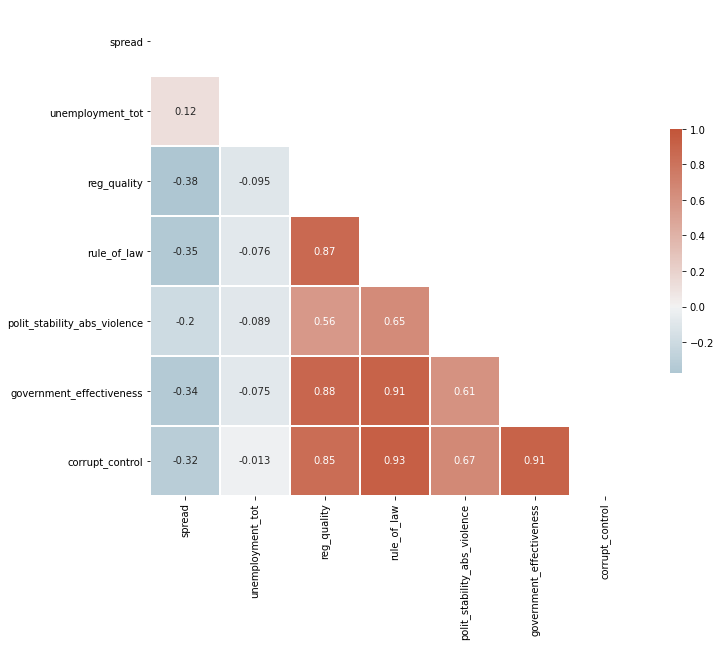

In [150]:
# Compute the correlation matrix
corr = all_df.fillna(0)[['spread']+relevant_columns].corr()

#sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('corr_matrix.png')

<AxesSubplot:>

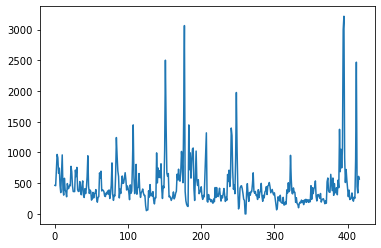

In [38]:
all_df.spread.plot()

In [69]:
all_df.spread.max()

3216.123

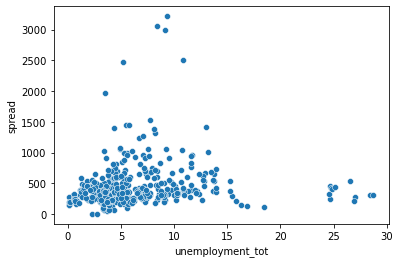

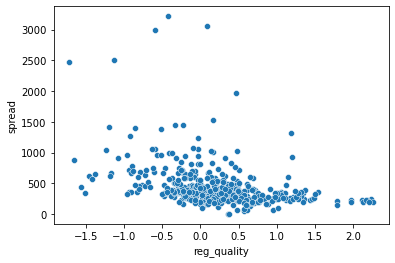

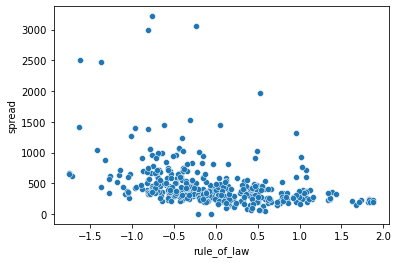

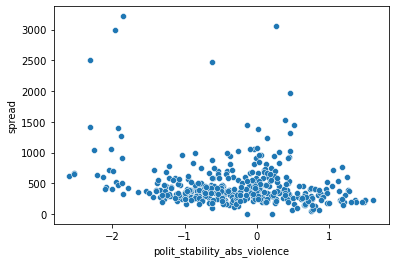

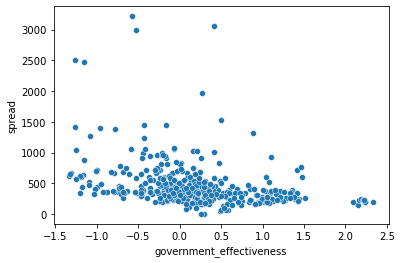

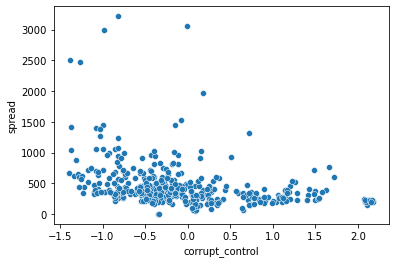

In [68]:
for col in relevant_columns:
    sns.scatterplot(data=all_df, x=col, y='spread')
    plt.show()

In [138]:
relevant_columns = list(set(relevant_columns) - set(remove_cols))
relevant_columns

['unemployment_tot',
 'reg_quality',
 'rule_of_law',
 'polit_stability_abs_violence',
 'government_effectiveness',
 'corrupt_control']

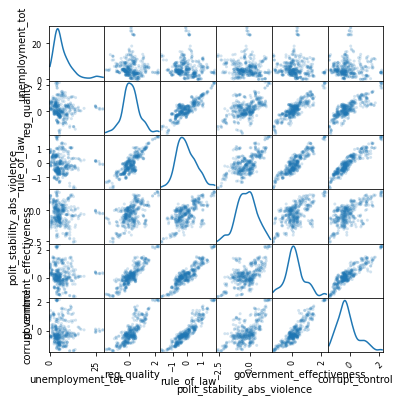

In [75]:
from pandas.plotting import scatter_matrix

scatter_matrix(all_df[relevant_columns+['spread']], alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.show()

## split, train test

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

tmp_all = all_df[all_df.spread < 1500]

X = tmp_all[relevant_columns]
y = tmp_all['spread']

#scaler = MinMaxScaler()
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#scaler.fit(X_train)
#X_train = scaler.transform(X_train)

#scaler.fit(y_train.to_numpy().reshape(-1, 1))
#y_train = scaler.transform(y_train.to_numpy().reshape(-1, 1))

print(X_train)

     unemployment_tot  reg_quality  rule_of_law  polit_stability_abs_violence  \
17               1.38     0.608239     0.456353                     -0.793426   
337              6.13    -0.068178     0.168532                     -0.605891   
408              2.23     0.930290     0.806547                      0.704976   
384             10.84     0.196142    -0.208760                     -2.009063   
228              3.48     0.103778    -0.658005                     -0.836903   
..                ...          ...          ...                           ...   
20               1.56     0.485153     0.494427                     -0.627359   
266              4.74     0.361237    -0.118744                      0.303620   
45              11.60    -0.207316    -0.157332                     -0.377205   
238              3.74    -0.712442    -1.146224                     -2.042074   
277              3.27     0.463544    -0.576481                     -0.760750   

     government_effectivene

In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit, RepeatedKFold, cross_validate, GridSearchCV
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

for rs in range(0,10,2):
    regr = RandomForestRegressor(max_depth=2, random_state=rs)

    regr.fit(X_train, y_train)

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
    cv_results = cross_validate(regr, X_train, y_train, cv=cv, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
    print('--> Random state',rs)
    print("Cross validation results: r2",cv_results['test_r2'])
    
    params = {'n_estimators' : [20,50,100,200],
         'max_features' : ['auto','sqrt','log2'],
         'min_samples_split' : [2,4,8],
         'bootstrap' : [True, False]}

    cv_grid = GridSearchCV(regr, cv=cv, param_grid=params, scoring='r2', n_jobs=8)
    cv_grid.fit(X_train, y_train)

    print('CV best score', cv_grid.best_score_)

--> Random state 0
Cross validation results: r2 [0.2470841  0.21477632 0.19111862 0.34250653 0.22977206]
CV best score 0.24505152528418533
--> Random state 2
Cross validation results: r2 [0.24449055 0.20528609 0.16726665 0.33368512 0.22908469]
CV best score 0.24443723830044015
--> Random state 4
Cross validation results: r2 [0.22967475 0.21865669 0.18089555 0.33186759 0.25974659]
CV best score 0.24659646471936755
--> Random state 6
Cross validation results: r2 [0.23254681 0.19883481 0.18559762 0.31417414 0.22339901]
CV best score 0.23316290779161827
--> Random state 8
Cross validation results: r2 [0.24013176 0.1836926  0.18542961 0.32380295 0.22853749]
CV best score 0.23702915737829625


In [88]:
regr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [93]:
bestmodel = cv_grid.best_estimator_#.fit(X_train,y_train)
y_pred = bestmodel.predict(X_test)

print(r2_score(y_test, y_pred))

0.0875216619182253
